In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import json
import requests
import folium
from folium.plugins import TimeSliderChoropleth

In [3]:
url = 'https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx'

In [31]:
df = pd.read_html(url)[0]
type(df)
df.head()

,State,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
0,Alabama,4.3,4.0,3.8,3.6,3.4,3.3,3.2,3.1,3.1,3.1,3.1,3.1
1,Alaska,6.6,6.6,6.6,6.7,6.6,6.6,6.6,6.4,6.3,6.1,6.0,5.7
2,Arizona,6.7,6.9,6.7,6.7,6.7,6.8,6.6,6.2,5.7,5.2,4.7,4.1
3,Arkansas,4.6,4.5,4.4,4.4,4.4,4.4,4.3,4.2,4.0,3.7,3.4,3.1
4,California,9.0,8.5,8.3,8.3,7.9,7.7,7.6,7.5,7.5,7.3,6.9,6.5


In [5]:
sorted = list(pd.DataFrame(
    df.set_index('State').transpose()\
    .mean().sort_values(ascending=False)).index
             )


In [6]:
x = df.set_index('State').transpose().index
x

Index(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'Aug.',
       'Sept.', 'Oct.', 'Nov.', 'Dec.'],
      dtype='object')

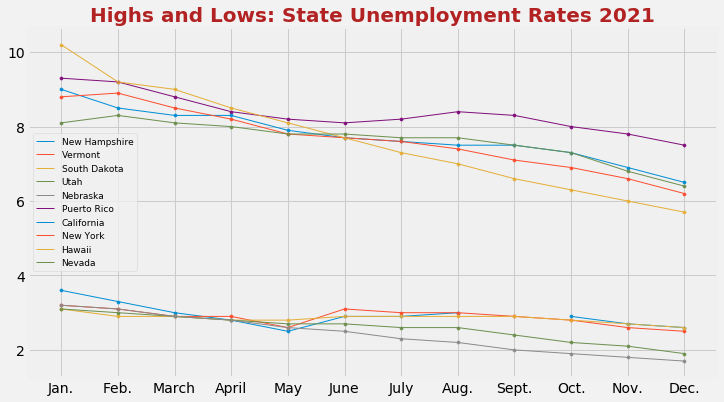

In [7]:
plt.figure(figsize=(11, 6), facecolor='0.95', )
plt.title('Highs and Lows: State Unemployment Rates 2021', fontsize=20, color='firebrick', weight='semibold')
states = df.set_index('State').transpose().columns
highest = sorted[ :5 ]
lowest = sorted[ -5: ]
merged = [ *lowest, *highest ]
for s in merged: #state
    pass
    y = df.set_index('State').transpose()[s]
    len(y)
    plt.scatter( x, y, s=10 )
    plt.plot( x, y, linewidth=1 )
plt.legend( merged, fontsize=9 )
plt.show()    

In [8]:
urljson = 'https://raw.githubusercontent.com/shawnbot/topogram/master/data/us-states.geojson'

In [9]:
geo = json.loads(requests.get(urljson).text)

In [11]:
m = folium.Map(location=[35, -95], zoom_start=4)
m.choropleth(
    geo_data = geo,                  #json
    data =  df,                     
    columns = ['State', 'April'], #columns to work on
    key_on ='feature.properties.name',
    fill_color ='YlGnBu',     
    line_color ='white',     
    fill_opacity = 0.7,
    line_opacity = 0.8,
   legend_name = "Scale Test"
)
# m

C:\Users\DENVER\anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [12]:
geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'scalerank': 2,
    'featurecla': 'Admin-1 scale rank',
    'adm1_code': 'USA-3557',
    'diss_me': 3557,
    'adm1_cod_1': 'USA-3557',
    'iso_3166_2': 'US-MD',
    'wikipedia': 'http://en.wikipedia.org/wiki/Maryland',
    'sr_sov_a3': 'US1',
    'sr_adm0_a3': 'USA',
    'iso_a2': 'US',
    'adm0_sr': 1,
    'admin0_lab': 2,
    'name': 'Maryland',
    'name_alt': 'MD',
    'name_local': None,
    'type': 'State',
    'type_en': 'State',
    'code_local': 'US24',
    'code_hasc': 'US.MD',
    'note': None,
    'hasc_maybe': None,
    'region': 'South',
    'region_cod': None,
    'region_big': 'South Atlantic',
    'big_code': None,
    'provnum_ne': 0,
    'gadm_level': 1,
    'check_me': 0,
    'scaleran_1': 2,
    'datarank': 1,
    'abbrev': 'Md.',
    'postal': 'MD',
    'area_sqkm': 0.0,
    'sameascity': -99,
    'labelrank': 0,
    'featurec_1': 'Admin-1 scale rank',
    'admin': 'United States 

In [ ]:
df['geometry'] = ['' for i in range(len(df))]

In [62]:
gdict = {}
for i in range(len(geo['features'])):
    pass
    geo[ 'features' ][i][ 'geometry' ]
    

{'type': 'Polygon',
 'coordinates': [[[-77.5232957631962, 39.725662387473676],
   [-76.66818185744877, 39.720886824146454],
   [-75.78764095768558, 39.7235434713057],
   [-75.71462477094249, 38.44930666722023],
   [-75.04838247431904, 38.44876893622896],
   [-75.05673010780255, 38.40412446083475],
   [-75.37753785657014, 38.015383363503446],
   [-75.37753785657014, 38.015383363503446],
   [-75.60985044791741, 38.000032424014584],
   [-75.72205057986953, 37.93705388244186],
   [-75.72205057986953, 37.93705388244186],
   [-75.87827423595218, 38.05393355432992],
   [-76.00671512415254, 38.15002096122224],
   [-76.11164948616312, 38.22852328438817],
   [-76.23286941533786, 38.319214176689535],
   [-76.2544938830582, 38.47263394974625],
   [-76.27714260028571, 38.633261878709746],
   [-76.29796047151916, 38.78094585452626],
   [-76.32378436221893, 38.96413287888539],
   [-76.34999874804332, 39.14999575508203],
   [-76.42480737142397, 38.982166071771175],
   [-76.48338804167524, 38.850748458

{'type': 'Polygon',
 'coordinates': [[[-92.01191959196088, 46.71171619018001],
   [-92.27487644825109, 46.65614425285608],
   [-92.26482599996189, 46.09522361258812],
   [-92.29658413624387, 46.0962830706721],
   [-92.54369713296988, 45.98569613169377],
   [-92.75697148660241, 45.8899127988739],
   [-92.89982868661633, 45.70576233982207],
   [-92.68921738170248, 45.51843670729799],
   [-92.76541514347723, 45.26708267745632],
   [-92.76647780234093, 44.996143076569545],
   [-92.79665475344622, 44.77602545591716],
   [-92.50507012343036, 44.583921059286126],
   [-92.38549539502651, 44.574926868301205],
   [-92.06215262872865, 44.432588194600285],
   [-91.94999090613301, 44.36483408970034],
   [-91.87960576031149, 44.257428725753684],
   [-91.62771079869884, 44.085444430379326],
   [-91.28959323325991, 43.93729314072517],
   [-91.25729096442721, 43.85473863044647],
   [-91.25465992350566, 43.6139823822244],
   [-91.2281958768639, 43.50125092084041],
   [-92.54000343318461, 43.519777033801

{'type': 'Polygon',
 'coordinates': [[[-104.02661597199905, 45.95660104413044],
   [-104.07795647854645, 45.040608308299994],
   [-105.74588918695422, 45.0511772829022],
   [-107.54663504864612, 45.04588319326197],
   [-109.10238042822058, 45.057015505093126],
   [-111.07140408238274, 45.04960249928492],
   [-111.06719185628448, 44.541593948401925],
   [-111.08518023825431, 44.50614211233465],
   [-111.19419239361537, 44.561157113989054],
   [-111.29154730927281, 44.70140247775968],
   [-111.40001533208317, 44.72892278170571],
   [-111.5423860135812, 44.53048724280844],
   [-111.77149142365909, 44.49821698177284],
   [-112.33613457072971, 44.560638587676046],
   [-112.36259221581204, 44.46222101315489],
   [-112.6901472082082, 44.49872910652645],
   [-112.87481299279334, 44.360084132610794],
   [-113.0520849762485, 44.61991062634467],
   [-113.17484127968402, 44.765430875077264],
   [-113.37857730978094, 44.78976960399162],
   [-113.43942413206685, 44.86279219229414],
   [-113.50293400

{'type': 'Polygon',
 'coordinates': [[[-97.22894085834139, 49.00088503170982],
   [-97.21414045296264, 48.90244185095098],
   [-97.12047283553103, 48.75852519285307],
   [-97.12734811034795, 48.64212243714177],
   [-97.16121876123852, 48.51458416881961],
   [-97.14851166579007, 48.31878287162362],
   [-97.13104181013323, 48.13729226051075],
   [-97.01516078151465, 47.95420446032262],
   [-96.89397926169643, 47.74886804037072],
   [-96.84423914500401, 47.54619146835778],
   [-96.82465037317918, 47.42661673995395],
   [-96.82041254084324, 47.29220319681483],
   [-96.77969222137341, 46.99904378318167],
   [-96.74582157048285, 46.944524902382305],
   [-96.73365220602567, 46.7164789503884],
   [-96.68548687295053, 46.513287052842166],
   [-96.60135757905454, 46.351356406536716],
   [-96.53891036691367, 46.199479409300196],
   [-96.53944809790494, 46.017966392729356],
   [-98.44178670759027, 45.96344751193],
   [-100.06686097568195, 45.96556642809797],
   [-102.11686435650553, 45.96135740277

{'type': 'MultiPolygon',
 'coordinates': [[[[-155.54211074652613, 19.083475550760266],
    [-155.68817032663983, 18.91619],
    [-155.936650056302, 19.059392884222692],
    [-155.90806069193283, 19.338878566935005],
    [-156.07347058578299, 19.70294165270269],
    [-156.0236792566152, 19.81421996009838],
    [-155.85008016787717, 19.977286883200843],
    [-155.91906977374512, 20.173949190138817],
    [-155.86107964735038, 20.267213509326968],
    [-155.78504992651037, 20.248700199484688],
    [-155.40214064981058, 20.079750243275356],
    [-155.224519781367, 19.9930219162549],
    [-155.06225945475146, 19.85910129319112],
    [-154.80741017346654, 19.508705536784852],
    [-154.8314704345461, 19.453280835327586],
    [-155.22217040905988, 19.239718411521142],
    [-155.54211074652613, 19.083475550760266]]],
  [[[-156.07926079627825, 20.643970887424278],
    [-156.41444964828258, 20.572414256228914],
    [-156.58673001578012, 20.78299995490511],
    [-156.70167001516393, 20.86429975953

{'type': 'Polygon',
 'coordinates': [[[-111.08518023825431, 44.50614211233465],
   [-111.04972840218704, 44.48816653348365],
   [-111.05024692850006, 42.00159600490288],
   [-114.0342250255645, 41.99312034023097],
   [-117.02825357091815, 42.00002122128559],
   [-117.01396529029299, 43.79706698163281],
   [-116.92665442136533, 44.0812129996028],
   [-117.00760854178904, 44.211414316643626],
   [-117.19439324254215, 44.27913001218705],
   [-117.19229993261185, 44.438938541544815],
   [-117.05152964096882, 44.66595704325182],
   [-116.83614277272771, 44.86384844959841],
   [-116.69328557271378, 45.1866470833456],
   [-116.55887202957467, 45.4443578616912],
   [-116.4577978078943, 45.57453037171464],
   [-116.51125723060966, 45.72640736895116],
   [-116.67899729208865, 45.8073614893749],
   [-116.91500358322115, 45.99998441231892],
   [-116.90652791854924, 46.17777492208711],
   [-116.99807021825345, 46.33017044563665],
   [-117.02664677950376, 47.72292572082168],
   [-117.03142874439042,

{'type': 'Polygon',
 'coordinates': [[[-117.03142874439042, 48.99930704731281],
   [-117.02664677950376, 47.72292572082168],
   [-116.99807021825345, 46.33017044563665],
   [-116.90652791854924, 46.17777492208711],
   [-116.91500358322115, 45.99998441231892],
   [-118.9782325858062, 45.99256820573101],
   [-119.33700158193362, 45.88833481447689],
   [-119.59204931156057, 45.9322367089784],
   [-119.78730967698559, 45.85076726302135],
   [-120.1582672422485, 45.74067004333864],
   [-120.60963479538444, 45.75390206665952],
   [-120.83719422886242, 45.67294794623579],
   [-121.0467396741329, 45.637499310948236],
   [-121.20388835555171, 45.68989927557962],
   [-121.56107616650245, 45.7327641174551],
   [-121.78809146742975, 45.70098357571513],
   [-122.1749152977148, 45.59514979460605],
   [-122.42045671160322, 45.59199702659176],
   [-122.65170664408677, 45.63008310436032],
   [-122.72578548969356, 45.770334869690345],
   [-122.75224313477591, 45.93807493116932],
   [-122.93796837744503,

{'type': 'Polygon',
 'coordinates': [[[-109.04522730571995, 36.99991679584756],
   [-109.04367172678093, 31.341898502591327],
   [-111.02378928341774, 31.334651937328022],
   [-113.30501699048716, 32.038977110940316],
   [-114.81474155939215, 32.52527797383052],
   [-114.72138761837212, 32.72083281098885],
   [-114.58984837541253, 32.71630050691958],
   [-114.4797799627472, 32.91633643567182],
   [-114.6559956888981, 33.05389954604551],
   [-114.69144112340594, 33.20368323335174],
   [-114.74330015626636, 33.37987335326495],
   [-114.54855831715435, 33.609522895893534],
   [-114.46918538190731, 34.06727280377109],
   [-114.16596911842552, 34.27258361748531],
   [-114.35489834158429, 34.46466880943807],
   [-114.48452991983675, 34.653053900046146],
   [-114.56708443011544, 34.828213368892754],
   [-114.62211863644812, 34.96368316933614],
   [-114.64221953302652, 35.05310655287237],
   [-114.58085418442761, 35.24942317560167],
   [-114.63005016856933, 35.44522767357738],
   [-114.6506951

{'type': 'Polygon',
 'coordinates': [[[-119.99897403842402, 41.99260821547738],
   [-120.00003349650804, 38.99539809509206],
   [-118.11462381070857, 37.64441939668112],
   [-116.32074682227419, 36.32204286575819],
   [-114.64221953302652, 35.05310655287237],
   [-114.62211863644812, 34.96368316933614],
   [-114.56708443011544, 34.828213368892754],
   [-114.48452991983675, 34.653053900046146],
   [-114.35489834158429, 34.46466880943807],
   [-114.16596911842552, 34.27258361748531],
   [-114.46918538190731, 34.06727280377109],
   [-114.54855831715435, 33.609522895893534],
   [-114.74330015626636, 33.37987335326495],
   [-114.69144112340594, 33.20368323335174],
   [-114.6559956888981, 33.05389954604551],
   [-114.4797799627472, 32.91633643567182],
   [-114.58984837541253, 32.71630050691958],
   [-114.72138761837212, 32.72083281098885],
   [-115.99107931526947, 32.61258244119877],
   [-117.1277274027436, 32.53532842211972],
   [-117.29593477806021, 33.04622407630108],
   [-117.94400304749

{'type': 'Polygon',
 'coordinates': [[[-102.04709376038831, 40.000814214458735],
   [-102.0385796863599, 38.45987564182244],
   [-102.04041053235396, 36.99197886216692],
   [-103.00283377865676, 36.995154035639175],
   [-104.20000861044578, 36.99619108826519],
   [-105.89976347072975, 36.99667120522169],
   [-107.47996920884756, 36.998700499557785],
   [-109.04522730571995, 36.998700499557785],
   [-109.05318444407885, 41.00208212332134],
   [-108.05094349818444, 41.00392577243426],
   [-107.04973960491604, 41.00392577243426],
   [-105.04686450454159, 41.00419463792989],
   [-104.04514208496018, 41.00392577243426],
   [-102.04805399430128, 41.00392577243426],
   [-102.04709376038831, 40.03309087705374],
   [-102.04709376038831, 40.000814214458735]]]}

{'type': 'Polygon',
 'coordinates': [[[-114.03295751679937, 41.99312034023097],
   [-114.02989116983724, 36.9940977783349],
   [-114.02331036675363, 36.18975464034648],
   [-114.0663352476146, 36.156421720447184],
   [-114.1325593798132, 36.00400059065998],
   [-114.26913024847681, 36.04325495302265],
   [-114.46073532347307, 36.11374892535431],
   [-114.67134022682754, 36.11374892535431],
   [-114.73960645648107, 35.99088379540866],
   [-114.65017667138542, 35.85405046280883],
   [-114.65069519769844, 35.638798027315545],
   [-114.63005016856933, 35.4451700595426],
   [-114.58085418442761, 35.24939756936399],
   [-114.64221953302652, 35.05309374975353],
   [-116.32074682227419, 36.322036464198774],
   [-118.11462381070857, 37.6444129951217],
   [-120.00003349650804, 38.99539809509206],
   [-119.99770652965888, 41.99260821547738],
   [-117.0257185533879, 41.997358172566926],
   [-117.0257185533879, 42.00002122128559],
   [-114.03295751679937, 41.99312034023097]]]}

{'type': 'Polygon',
 'coordinates': [[[-103.00448538098709, 36.995154035639175],
   [-103.00415249989727, 36.49932125077278],
   [-103.00415249989727, 33.87995037202671],
   [-103.00415249989727, 31.997085306096658],
   [-103.92977318109519, 31.997085306096658],
   [-105.73000051647409, 31.997085306096658],
   [-106.63012378650268, 31.997085306096658],
   [-106.61953560722219, 31.912994421557187],
   [-106.50734187682947, 31.753736426309544],
   [-108.24000075253159, 31.75457503059354],
   [-108.2419660312735, 31.341924108829],
   [-109.04367172678093, 31.341219937292816],
   [-109.04522730571995, 36.998700499557785],
   [-107.47996920884756, 36.998700499557785],
   [-105.89985949412105, 36.99667120522169],
   [-104.20083441161094, 36.99588381341304],
   [-103.00448538098709, 36.995154035639175]]]}

{'type': 'Polygon',
 'coordinates': [[[-116.91500358322115, 45.99998441231892],
   [-116.67899729208865, 45.8073614893749],
   [-116.51125723060966, 45.72640736895116],
   [-116.4577978078943, 45.57453037171464],
   [-116.55887202957467, 45.4443578616912],
   [-116.69328557271378, 45.1866470833456],
   [-116.83614277272771, 44.86384844959841],
   [-117.05152964096882, 44.66595704325182],
   [-117.19229993261185, 44.438938541544815],
   [-117.19439324254215, 44.27913001218705],
   [-117.00760854178904, 44.211414316643626],
   [-116.92665442136533, 44.0812129996028],
   [-117.01269778152785, 43.79706698163281],
   [-117.0257185533879, 42.00002122128559],
   [-117.0257185533879, 41.997358172566926],
   [-119.99770652965888, 41.99260821547738],
   [-124.21317501778262, 41.999477088734906],
   [-124.53252321100248, 42.76599341211127],
   [-124.14198007469446, 43.70837977742987],
   [-123.89884884792762, 45.523410718967234],
   [-123.99863635616464, 46.28306777142521],
   [-123.7766846887384

{'type': 'Polygon',
 'coordinates': [[[-104.07795647854645, 45.040608308299994],
   [-104.05255509076841, 43.00013684945262],
   [-104.04514208496018, 41.004111417657434],
   [-105.04686450454159, 41.00428425976177],
   [-107.04973960491604, 41.00392577243426],
   [-108.05094349818444, 41.00392577243426],
   [-109.05318444407885, 41.002683869906804],
   [-109.41472531543513, 41.0066784429848],
   [-109.82893181613869, 41.01204294977865],
   [-110.2467615994739, 41.01745866904787],
   [-110.69700887971139, 41.0232968912388],
   [-111.05448476083602, 41.02827730446746],
   [-111.05290997721872, 41.39065037854831],
   [-111.05143761855216, 41.72932487965678],
   [-111.05024692850006, 42.00176884700722],
   [-111.04972840218704, 44.48825615531553],
   [-111.08518023825431, 44.506186923250596],
   [-111.06719185628448, 44.541619554639595],
   [-111.07140408238274, 45.04961530240376],
   [-109.10238042822058, 45.05702190665256],
   [-107.54663504864612, 45.04588319326197],
   [-105.745889186

{'type': 'Polygon',
 'coordinates': [[[-89.66291857531323, 36.021976169510985],
   [-89.67351315615313, 35.93945366702938],
   [-89.77510590414653, 35.79896504400081],
   [-89.95026537299314, 35.70174456109117],
   [-89.98889238253268, 35.53615542357728],
   [-90.14710052203544, 35.404955463266944],
   [-90.13493115757827, 35.11393417048002],
   [-90.24923740257955, 35.020823488717944],
   [-90.2682820418537, 34.94145055347092],
   [-90.44661668417254, 34.86684037843228],
   [-90.45031038395783, 34.72185786069096],
   [-90.58420540078393, 34.45409983483586],
   [-90.6995486984112, 34.39746523864823],
   [-90.8763085571128, 34.26147051033241],
   [-90.98213913744216, 34.05510984087333],
   [-91.20068197447728, 33.706391293035075],
   [-91.22344591977433, 33.46932874459828],
   [-91.10807701590936, 33.20683920214574],
   [-91.1562423489845, 33.01000405310343],
   [-92.00130580644274, 33.043874703993986],
   [-93.09402639317767, 33.01051617785702],
   [-94.05975924570053, 33.0121165677119

{'type': 'Polygon',
 'coordinates': [[[-91.2281958768639, 43.50125092084041],
   [-91.21390759623873, 43.44675444549902],
   [-91.083738286995, 43.28800217344554],
   [-91.17316167053123, 43.21232293798378],
   [-91.16998649705897, 43.00223656094234],
   [-91.12924057135146, 42.91283238208437],
   [-91.06469364772087, 42.754086511590316],
   [-90.73817570795075, 42.65827437175305],
   [-90.6408207922933, 42.5053603218905],
   [-90.58260501092894, 42.429168961675146],
   [-90.46459866458297, 42.378366186119024],
   [-90.41698386561795, 42.27041668962168],
   [-90.25980637718177, 42.18998109551096],
   [-90.15663884557108, 42.103739287006405],
   [-90.21007266204876, 41.83491220072819],
   [-90.39527617762516, 41.608412225334185],
   [-90.46196762366142, 41.53645869745479],
   [-90.6905545074263, 41.478787048641145],
   [-91.03399817030258, 41.42956545826172],
   [-91.1234215538388, 41.25758116288736],
   [-90.99906486054832, 41.179815019054736],
   [-90.95674415122353, 41.02475644678653

{'type': 'Polygon',
 'coordinates': [[[-94.62279560135677, 36.99991679584756],
   [-95.50016132764769, 36.998854136983866],
   [-97.29984453047591, 36.997279353366565],
   [-99.10007186585482, 36.995154035639175],
   [-100.10021310025951, 36.9940977783349],
   [-101.09979099743525, 36.99304152103062],
   [-102.04118512104377, 36.99197886216692],
   [-102.04012246218007, 38.4599588620949],
   [-102.05017291046929, 40.00098065500365],
   [-102.04805399430128, 40.00098065500365],
   [-100.30022982433348, 40.00098065500365],
   [-99.00007310615693, 40.00098065500365],
   [-96.6997751535757, 40.00098065500365],
   [-95.32288294263311, 40.00098065500365],
   [-95.0853018678833, 39.86781541595142],
   [-94.95510055084246, 39.8700303555107],
   [-94.92654959582983, 39.72507344400705],
   [-95.06729428123519, 39.53988913310892],
   [-94.99109651946043, 39.444659535178864],
   [-94.86779608347422, 39.23457955969683],
   [-94.60481362094635, 39.13985568496095],
   [-94.61538259554857, 38.06883638

{'type': 'Polygon',
 'coordinates': [[[-91.43033151710586, 40.368596606249376],
   [-91.51763598447411, 40.11987681810898],
   [-91.42821260093787, 39.820904788522576],
   [-91.26259145562688, 39.61504984225767],
   [-91.07156892253782, 39.44519086461071],
   [-90.84137524735856, 39.3107773214716],
   [-90.74928881510365, 39.26527503711513],
   [-90.66570365375834, 39.074777431898504],
   [-90.6498085817188, 38.907549495173114],
   [-90.5355279429552, 38.86576651683959],
   [-90.34659871979642, 38.93030703891077],
   [-90.15609471302037, 38.769442252248744],
   [-90.21272930920802, 38.584776467663616],
   [-90.30533426777592, 38.43925621893102],
   [-90.3698811914065, 38.263559019093144],
   [-90.22808024869686, 38.11328241171159],
   [-90.0301568345532, 37.971993593755535],
   [-89.91690684685618, 37.968280689292],
   [-89.65498704319201, 37.74868159495262],
   [-89.55390641995218, 37.7190423748386],
   [-89.47928984335414, 37.47721706619342],
   [-89.51634206927636, 37.3269212541336]

{'type': 'Polygon',
 'coordinates': [[[-96.45529319777125, 42.488959526656785],
   [-96.4103094397278, 42.38947929327193],
   [-96.3468251749609, 42.22437027271453],
   [-96.34894409112889, 42.141822163995236],
   [-96.16743427533777, 41.95343067182775],
   [-96.10446213532445, 41.78780952651675],
   [-96.09704912951624, 41.55655959403319],
   [-96.02508920007743, 41.52428293143819],
   [-95.95842976183827, 41.40470820303435],
   [-95.85574874874348, 41.116298746490735],
   [-95.83406666698838, 40.94380232636279],
   [-95.862099095688, 40.76492995305266],
   [-95.79649591475311, 40.583957868252796],
   [-95.77636941193704, 40.50140335797409],
   [-95.60811082414506, 40.34316961223362],
   [-95.45254012712324, 40.21494637705354],
   [-95.32288294263311, 40.00098065500365],
   [-96.6997751535757, 40.00098065500365],
   [-99.00007310615693, 40.00098065500365],
   [-100.30022982433348, 40.00098065500365],
   [-102.04805399430128, 40.00098065500365],
   [-102.04709376038831, 40.000980655003

{'type': 'Polygon',
 'coordinates': [[[-94.62860821731002, 36.5399775546484],
   [-94.43017267841276, 35.483003275714054],
   [-94.45136184009253, 34.510555187359735],
   [-94.47991279510516, 33.635910123822256],
   [-94.91014239903669, 33.83174662959505],
   [-95.1905947172214, 33.93814054715338],
   [-95.418125343682, 33.87039924537226],
   [-95.7695005386795, 33.88100022777158],
   [-95.97746799955299, 33.879425444154286],
   [-96.14890816237664, 33.797933592739284],
   [-96.3161296975426, 33.7561314097275],
   [-96.46271260513889, 33.80532739386924],
   [-96.79661794447956, 33.751349444840855],
   [-96.9479508091654, 33.918058855253236],
   [-97.10406563873788, 33.77359486382492],
   [-97.37658002324194, 33.83814178745552],
   [-97.65703234142664, 33.993712484477314],
   [-97.95709263611444, 33.89369452010119],
   [-98.08832460422188, 34.13447637456094],
   [-98.55398043798299, 34.11065617195958],
   [-98.8518962102651, 34.16463412098797],
   [-99.18740193946073, 34.23555699780076]

{'type': 'Polygon',
 'coordinates': [[[-96.45266215684968, 43.501788651831674],
   [-96.5860130411251, 43.50125092084041],
   [-96.58706929842937, 43.25730669602725],
   [-96.45953103010721, 43.12449994430252],
   [-96.48335763426799, 43.016006315254494],
   [-96.53521026556898, 42.855679259583724],
   [-96.61564585967972, 42.691632897890024],
   [-96.45371841415397, 42.58050182636099],
   [-96.45529319777125, 42.488959526656785],
   [-96.62303966080967, 42.502729280968936],
   [-96.70876934456062, 42.55086260624697],
   [-96.75427162891708, 42.63396124907637],
   [-97.02838640327612, 42.71754641042167],
   [-97.28715663970571, 42.846140936048116],
   [-97.64434445065646, 42.83609048775891],
   [-97.88192552540629, 42.83979058910359],
   [-97.96819934170792, 42.794288304747134],
   [-98.3359561272609, 42.87522322049261],
   [-98.59418223113978, 43.00326081044951],
   [-100.59974598647058, 43.00326081044951],
   [-102.09991302716169, 43.00326081044951],
   [-104.05255509076841, 43.00326

{'type': 'Polygon',
 'coordinates': [[[-92.00130580644274, 33.043874703993986],
   [-91.1562423489845, 33.01000405310343],
   [-91.08479454429927, 32.952850930602786],
   [-91.17579911301222, 32.80838053761506],
   [-91.03082299683032, 32.60253199290957],
   [-91.0720810472914, 32.47871303061035],
   [-90.94296799535196, 32.30673513679542],
   [-91.08161937082701, 32.204598256251316],
   [-91.12817791248777, 32.015694639330235],
   [-91.32131936174481, 31.85957980975775],
   [-91.41128687783171, 31.650031163707574],
   [-91.50229144654467, 31.40873078293482],
   [-91.62452922366718, 31.297081185092775],
   [-91.58378329795966, 31.047330745885795],
   [-90.70166761457921, 31.015572609603794],
   [-89.7592172336664, 31.01346009499523],
   [-89.78779379491674, 30.847288415574127],
   [-89.8539411084023, 30.683242053880424],
   [-89.79045684363538, 30.556792050659634],
   [-89.65868074297728, 30.440879014243958],
   [-89.62322890691, 30.275257868932968],
   [-89.60470279394889, 30.17630256

{'type': 'Polygon',
 'coordinates': [[[-94.47991279510516, 33.6359869425353],
   [-94.42753523593176, 33.57038376160042],
   [-94.23333752937043, 33.58360938336188],
   [-94.0020875968869, 33.579915683576615],
   [-94.05975924570053, 33.012116567711985],
   [-93.99890602185522, 31.942646444790046],
   [-93.83485966016151, 31.829940589643734],
   [-93.77930692751582, 31.675432551485635],
   [-93.69412137631555, 31.44365769112965],
   [-93.57823394613757, 31.21613346622847],
   [-93.48984121366794, 31.079601006921383],
   [-93.58616547825878, 30.713943932858136],
   [-93.65019387557636, 30.605469508488362],
   [-93.73750474450404, 30.366800168637173],
   [-93.66448215620153, 30.30014073039802],
   [-93.66711959868252, 30.100642532637046],
   [-93.81687767975107, 29.968354307225333],
   [-93.9184768293039, 29.821771399629043],
   [-93.8484181630128, 29.7136298563491],
   [-94.69000557370603, 29.479928126607742],
   [-95.60017929202381, 28.73855712863263],
   [-96.59394457324633, 28.307290

{'type': 'Polygon',
 'coordinates': [[[-72.87616692261062, 41.220554543202816],
   [-73.64788771379537, 40.95323822494768],
   [-73.64827180736056, 40.95462096178238],
   [-73.6566898579977, 40.985066778383306],
   [-73.69267942505624, 41.10731095706523],
   [-73.47517364064716, 41.20466587272269],
   [-73.55349031858991, 41.28985782548238],
   [-73.49793758594423, 42.05451129506756],
   [-72.73222145749534, 42.035985182106444],
   [-71.80090978997313, 42.013246843047064],
   [-71.79295265161423, 41.46661768418396],
   [-71.85382508013781, 41.32003477658767],
   [-72.29514218498456, 41.26975692890397],
   [-72.87616692261062, 41.220554543202816]]]}

{'type': 'Polygon',
 'coordinates': [[[-70.81505043463417, 42.86519197688166],
   [-70.82510088292337, 42.33496361325227],
   [-70.49491484960566, 41.8047352496229],
   [-70.08005538984126, 41.77987799439553],
   [-70.18482971286633, 42.144997337467494],
   [-69.88480142597565, 41.92276720220654],
   [-69.96520501228929, 41.63699518814392],
   [-70.63989736734698, 41.475067742618194],
   [-71.12037921272452, 41.49465011288358],
   [-71.14789951667055, 41.647589768983806],
   [-71.30507060354732, 41.762408138738685],
   [-71.37914944915411, 42.02435995019995],
   [-71.80090978997313, 42.013246843047064],
   [-72.73222145749534, 42.035985182106444],
   [-73.49793758594423, 42.05451129506756],
   [-73.28203219139012, 42.743485529191005],
   [-72.45706963051029, 42.72708473395728],
   [-71.24898013991036, 42.718090542972355],
   [-71.14578060050256, 42.816508117493505],
   [-70.9335945119714, 42.88425582083405],
   [-70.81505043463417, 42.86519197688166]]]}

{'type': 'Polygon',
 'coordinates': [[[-70.6457355895379, 43.090078759301846],
   [-70.81505043463417, 42.86519197688166],
   [-70.9335945119714, 42.88425582083405],
   [-71.14578060050256, 42.816508117493505],
   [-71.24898013991036, 42.718090542972355],
   [-72.45706963051029, 42.72708473395728],
   [-72.537505224621, 42.83079639811867],
   [-72.45864441412756, 42.96045358260881],
   [-72.4343056852132, 43.22291751882368],
   [-72.40361020779491, 43.28536473096455],
   [-72.36976516314203, 43.52188954841009],
   [-72.2602088752303, 43.72138774617106],
   [-72.17819849750228, 43.8086922135393],
   [-72.05913589385203, 44.04576116353552],
   [-72.03637194855496, 44.206625950197555],
   [-72.00303902865568, 44.30401287365212],
   [-71.80989757939864, 44.35214619893015],
   [-71.58552292173202, 44.46804003066756],
   [-71.5463773858795, 44.59239672395805],
   [-71.62045623148629, 44.73579805652266],
   [-71.50351254400401, 45.00779391471371],
   [-71.5050873276213, 45.008312441026725],
 

{'type': 'Polygon',
 'coordinates': [[[-71.12037921272452, 41.49465011288358],
   [-71.85382508013781, 41.32003477658767],
   [-71.79295265161423, 41.46661768418396],
   [-71.80090978997313, 42.013246843047064],
   [-71.37914944915411, 42.02435995019995],
   [-71.30507060354732, 41.762408138738685],
   [-71.14789951667055, 41.647589768983806],
   [-71.12037921272452, 41.49465011288358]]]}

{'type': 'Polygon',
 'coordinates': [[[-72.45706963051029, 42.72708473395728],
   [-73.28203219139012, 42.743485529191005],
   [-73.23971148206533, 43.56793596531723],
   [-73.38311281462994, 43.575355372684875],
   [-73.40163892759105, 43.61343184811429],
   [-73.33812905658648, 43.75843997209329],
   [-73.42967135629067, 44.01984124944446],
   [-73.32913486560156, 44.22673324833538],
   [-73.38416907193422, 44.379147976563175],
   [-73.4079700698573, 44.676007491541036],
   [-73.36828040145409, 44.804602017167475],
   [-73.34766097856267, 45.00725618372244],
   [-71.5050873276213, 45.008312441026725],
   [-71.50351254400401, 45.00779391471371],
   [-71.62045623148629, 44.73579805652266],
   [-71.5463773858795, 44.59239672395805],
   [-71.58552292173202, 44.46804003066756],
   [-71.80989757939864, 44.35214619893015],
   [-72.00303902865568, 44.30401287365212],
   [-72.03637194855496, 44.206625950197555],
   [-72.05913589385203, 44.04576116353552],
   [-72.17819849750228, 43.8086922135

{'type': 'Polygon',
 'coordinates': [[[-85.62539103360406, 34.98589658052311],
   [-85.36555813831079, 33.74448057158333],
   [-85.12955184717825, 32.75071529036082],
   [-84.98615051461366, 32.437967104902846],
   [-84.89884604724539, 32.25911393627097],
   [-85.0639230600057, 32.08341673643309],
   [-85.11950139888906, 31.765400067572557],
   [-85.06552344986066, 31.577014976964485],
   [-85.09038070508805, 31.400280724500586],
   [-85.1179010090341, 31.236234362806872],
   [-85.0544167442672, 31.108696094484714],
   [-85.00519515388778, 30.99069614969816],
   [-87.04566021117573, 30.984883533744913],
   [-87.61715302682562, 30.92772400968485],
   [-87.63304169730574, 30.851526247910087],
   [-87.40496693829446, 30.608651083520037],
   [-87.45788863001854, 30.411271801927047],
   [-87.53038629044863, 30.274195210069266],
   [-88.41780246502877, 30.384814156844698],
   [-88.44952859351366, 31.911982975168847],
   [-88.27333847360046, 33.5100490640681],
   [-88.09552235759459, 34.80598

{'type': 'Polygon',
 'coordinates': [[[-81.49047016688093, 30.729832603338266],
   [-81.31371030817937, 30.035519468658656],
   [-80.97983057507636, 29.17989983971705],
   [-80.53558795757475, 28.472130627136863],
   [-80.53003780555773, 28.040070177211263],
   [-80.05654006150728, 26.87999878381983],
   [-80.0880165291748, 26.205760939480953],
   [-80.1315599363488, 25.816776582891684],
   [-80.38102870694131, 25.20615743606752],
   [-80.67979588662627, 25.079918684307593],
   [-81.17191576702915, 25.201100204125822],
   [-81.33011750497249, 25.639754260253895],
   [-81.71006926122033, 25.869947935433167],
   [-82.2397790985367, 26.729843806067255],
   [-82.70514686212391, 27.49504140820313],
   [-82.85525702896054, 27.88624070435167],
   [-82.64988219965213, 28.550165636465138],
   [-82.930001636747, 29.099995575038175],
   [-83.70958994445877, 29.936564163146237],
   [-84.09979699889722, 30.09004795179715],
   [-85.10881719621727, 29.63615178269036],
   [-85.2878368053941, 29.686122

{'type': 'Polygon',
 'coordinates': [[[-83.07637329288244, 34.97902770726558],
   [-83.18592317923475, 34.895954670673866],
   [-83.34625023490551, 34.706513322761516],
   [-83.07637329288244, 34.54034804489983],
   [-82.90281421389078, 34.479494821054494],
   [-82.7165480394507, 34.16305293581126],
   [-82.59748543580044, 33.98578095235609],
   [-82.24929181583461, 33.74871840391929],
   [-82.18050705986806, 33.62435530906938],
   [-81.94344451143128, 33.46136520467994],
   [-81.8270129487026, 33.22323999737946],
   [-81.5073958899871, 33.02162928500992],
   [-81.43595448686129, 32.793035999685614],
   [-81.37670805443035, 32.682449060707285],
   [-81.41109723163392, 32.6088887414135],
   [-81.22483105719382, 32.49936446129887],
   [-81.12641348267267, 32.312029226435655],
   [-81.12798826628996, 32.12153162121902],
   [-81.03644596658575, 32.08447939529679],
   [-80.86500580376207, 32.03316449498707],
   [-81.33628860825326, 31.440488919216815],
   [-81.49047016688093, 30.72983260333

{'type': 'Polygon',
 'coordinates': [[[-89.59370491486554, 30.16004260249406],
   [-89.59383294605395, 30.1599913900187],
   [-89.59392896944524, 30.160375483583895],
   [-89.62322890691, 30.275257868932968],
   [-89.65868074297728, 30.440879014243958],
   [-89.79045684363538, 30.556792050659634],
   [-89.8539411084023, 30.683242053880424],
   [-89.78779379491674, 30.847288415574127],
   [-89.7592172336664, 31.01346009499523],
   [-90.70166761457921, 31.015572609603794],
   [-91.58378329795966, 31.047330745885795],
   [-91.62452922366718, 31.297081185092775],
   [-91.50229144654467, 31.40873078293482],
   [-91.41128687783171, 31.650031163707574],
   [-91.32131936174481, 31.85957980975775],
   [-91.12817791248777, 32.015694639330235],
   [-91.08161937082701, 32.204598256251316],
   [-90.94296799535196, 32.30673513679542],
   [-91.0720810472914, 32.47871303061035],
   [-91.03082299683032, 32.60253199290957],
   [-91.17579911301222, 32.80838053761506],
   [-91.08479454429927, 32.952850930

{'type': 'Polygon',
 'coordinates': [[[-78.55411327034095, 33.8614242590656],
   [-79.06066866723562, 33.493949142127114],
   [-79.20357067816549, 33.15839220045613],
   [-80.30132289060444, 32.50935089399387],
   [-80.86500580376207, 32.03316449498707],
   [-81.03644596658575, 32.08447939529679],
   [-81.12798826628996, 32.12153162121902],
   [-81.12641348267267, 32.312029226435655],
   [-81.22483105719382, 32.49936446129887],
   [-81.41109723163392, 32.6088887414135],
   [-81.37670805443035, 32.682449060707285],
   [-81.43595448686129, 32.793035999685614],
   [-81.5073958899871, 33.02162928500992],
   [-81.8270129487026, 33.22323999737946],
   [-81.94344451143128, 33.46136520467994],
   [-82.18050705986806, 33.62435530906938],
   [-82.24929181583461, 33.74871840391929],
   [-82.59748543580044, 33.98578095235609],
   [-82.7165480394507, 34.16305293581126],
   [-82.90281421389078, 34.479494821054494],
   [-83.07637329288244, 34.54034804489983],
   [-83.34625023490551, 34.70651332276151

{'type': 'Polygon',
 'coordinates': [[[-88.57785425364447, 42.50310057141528],
   [-87.80920621098129, 42.494253616297016],
   [-87.80920621098129, 42.496891058778004],
   [-87.80444345077291, 42.496871854099744],
   [-87.80409776656421, 42.49399115236081],
   [-87.79601899857634, 42.23411344615157],
   [-87.52633410333587, 41.708513409982764],
   [-87.52623167838514, 41.706945027924895],
   [-87.52607163939965, 41.70533183495109],
   [-87.52614845811269, 41.70533183495109],
   [-87.52721111697637, 40.54853163842321],
   [-87.52826737428066, 39.3914945841968],
   [-87.64203588829066, 39.1135580788641],
   [-87.55999990432497, 39.04018980635292],
   [-87.5070846141603, 38.869370594792976],
   [-87.5150417525192, 38.735008264129235],
   [-87.59865252010219, 38.674180646521584],
   [-87.67113097585401, 38.50856590277001],
   [-87.8785607057362, 38.29055439516675],
   [-88.01880606950682, 38.02173371044796],
   [-88.05108273210182, 37.819604471765416],
   [-88.04420745728488, 37.7449814936

{'type': 'Polygon',
 'coordinates': [[[-86.82592668408854, 41.75605779179416],
   [-85.74887711481345, 41.75130143314521],
   [-84.8076622348687, 41.75605779179416],
   [-84.80693885865426, 41.677741113851425],
   [-84.81002441029463, 40.77286148517388],
   [-84.81791113149993, 39.799741233080475],
   [-84.82369814121549, 39.10652916662108],
   [-84.88138899470741, 39.059426492409635],
   [-84.79989074173298, 38.85517833755912],
   [-84.84327410992145, 38.78109949195233],
   [-85.01155830395113, 38.77949270053794],
   [-85.1676411257265, 38.69112557430599],
   [-85.4041851478503, 38.72712154292394],
   [-85.42589283584309, 38.53503635097119],
   [-85.56663111968905, 38.461994557990415],
   [-85.69840722034716, 38.290010262616065],
   [-85.83968963674378, 38.258802660444175],
   [-86.05983286363387, 37.96088688816205],
   [-86.2625062348671, 38.046622973472424],
   [-86.325471973321, 38.16937927690795],
   [-86.49957518486332, 37.96988107914697],
   [-86.61016212384166, 37.8587500076179

{'type': 'Polygon',
 'coordinates': [[[-84.03895017661132, 38.7609921938145],
   [-83.82673848184247, 38.690069317001715],
   [-83.67274256843797, 38.60911519657798],
   [-83.43461736113746, 38.63715402683703],
   [-83.25894576753726, 38.579475976463954],
   [-83.04464076283811, 38.63451658435604],
   [-82.85519301336633, 38.65144230746219],
   [-82.77527594556862, 38.51121614836983],
   [-82.58900977112854, 38.415429614770254],
   [-82.5699651318544, 38.32019361528078],
   [-82.58055971269431, 38.11328241171159],
   [-82.46149710904405, 37.9571675821391],
   [-82.41333817752835, 37.80531619114026],
   [-82.26729940248273, 37.675659006650115],
   [-82.16728143810661, 37.554477486831885],
   [-81.97253319743518, 37.535951373870766],
   [-82.0753870526343, 37.45935671541196],
   [-82.37259225182083, 37.23804200314806],
   [-82.68478990316869, 37.12109831566579],
   [-82.68478990316869, 37.12109831566579],
   [-82.70912863208305, 37.04014419524206],
   [-82.70913503364247, 37.040144195242

{'type': 'Polygon',
 'coordinates': [[[-79.99239643612013, 36.54219249420768],
   [-77.99954617779719, 36.537429733999296],
   [-76.94121476826582, 36.54587979243353],
   [-75.99324624313311, 36.55056573392888],
   [-75.8680765517963, 36.55118028363319],
   [-75.8680765517963, 36.55118028363319],
   [-75.72731266171269, 35.55051412135606],
   [-76.36337160567142, 34.80862459706794],
   [-77.39763315178406, 34.51201474290747],
   [-78.05495807613563, 33.92546545950202],
   [-78.55411327034095, 33.8614242590656],
   [-79.67277937740461, 34.80756193820424],
   [-80.78351395234708, 34.81763799273112],
   [-80.78085090362842, 34.93404394922212],
   [-80.93748425951391, 35.10339080211549],
   [-81.03802075020305, 35.0372370870705],
   [-81.04597788856194, 35.12560421330245],
   [-81.51427116480404, 35.17165063020961],
   [-82.43661424757899, 35.18010068864385],
   [-82.97637453318458, 35.00866052582018],
   [-83.07637329288244, 34.97902770726558],
   [-84.32097087685388, 34.986959239386806],

{'type': 'Polygon',
 'coordinates': [[[-80.51893109996425, 40.64111099075344],
   [-80.65755046764221, 40.590833143069744],
   [-80.61522975831743, 40.46383900729827],
   [-80.66178829997816, 40.23363893055958],
   [-80.76498783938597, 39.97330031207211],
   [-80.86183063028983, 39.75738851595858],
   [-80.87874995183657, 39.65422098434787],
   [-81.15075221158703, 39.42614622533659],
   [-81.26609550921432, 39.37744316127018],
   [-81.40104678334471, 39.34940433101113],
   [-81.52222830316295, 39.37163054531693],
   [-81.74500257097456, 39.19964624994258],
   [-81.7857548982415, 39.01922469925283],
   [-81.81696250041338, 38.92183777579828],
   [-81.90587375919603, 38.882148107395054],
   [-81.91856164996622, 38.993797705237085],
   [-82.05403145040961, 39.01816204038913],
   [-82.19479534049323, 38.80120038853073],
   [-82.21065840473567, 38.579475976463954],
   [-82.34083411553884, 38.440831002548315],
   [-82.58900977112854, 38.415429614770254],
   [-82.77527594556862, 38.511216148

{'type': 'Polygon',
 'coordinates': [[[-87.87434847963793, 36.65649873920896],
   [-87.84204621080524, 36.61097084861481],
   [-87.21658184768637, 36.639003277314444],
   [-86.67788422094452, 36.63373479391189],
   [-86.09262165098247, 36.62577125399357],
   [-85.51900991916459, 36.597745226853355],
   [-85.23115099673109, 36.60990818975112],
   [-84.35009157065491, 36.56704334787563],
   [-83.67328670098865, 36.59985774146191],
   [-83.67328670098865, 36.59985774146191],
   [-82.18631967582131, 36.56598068901193],
   [-82.06990091621147, 36.57048738684353],
   [-81.67937378380202, 36.585569460836744],
   [-81.70477517158008, 36.46015010868257],
   [-81.69366206442719, 36.31729290866865],
   [-81.89739809452412, 36.273909540480155],
   [-82.05139400792862, 36.1061438727635],
   [-82.22389042805656, 36.12573264458832],
   [-82.59324760346449, 35.93734115242082],
   [-82.67422733012592, 36.02518975233976],
   [-82.92557815918786, 35.889719951896375],
   [-82.92028406954763, 35.8172158899

{'type': 'Polygon',
 'coordinates': [[[-90.4056339007665, 46.58130362167833],
   [-90.39688296903955, 46.57625279129604],
   [-90.33497348788993, 46.59687221418746],
   [-90.33391082902624, 46.5936938399355],
   [-90.17673974214946, 46.560879446349226],
   [-90.09630414803875, 46.380992425871035],
   [-89.2210573379158, 46.20211365100147],
   [-88.6442768341851, 46.02220422506531],
   [-88.36170559983242, 46.02062944144803],
   [-88.1669637607204, 46.00791594444016],
   [-88.11192955438774, 45.84335105643344],
   [-87.8754047369422, 45.779841185428864],
   [-87.78701200447257, 45.639618227116216],
   [-87.84789083455557, 45.55918263300549],
   [-87.89338671735263, 45.39671425570878],
   [-87.67324989202199, 45.387745670961536],
   [-87.74732873762876, 45.226877683519795],
   [-87.61397785335336, 45.10887453795354],
   [-87.61291519448967, 45.11044932157082],
   [-87.58745619267683, 45.103433212446646],
   [-87.59643117898348, 45.093709243687854],
   [-87.98832184354937, 44.733314251467

{'type': 'Polygon',
 'coordinates': [[[-80.51982731828302, 40.64111099075344],
   [-80.51982731828302, 39.719107190627724],
   [-79.47751901197961, 39.719107190627724],
   [-79.48599467665153, 39.21253258905479],
   [-79.33251728956003, 39.30240408175041],
   [-79.16107712673636, 39.417990638635665],
   [-78.9631601141521, 39.4577827319896],
   [-78.82929070356369, 39.56259546437121],
   [-78.53401237376254, 39.52241287589266],
   [-78.4250002184015, 39.59651092617771],
   [-78.23240290169515, 39.67219656319889],
   [-77.92335481758185, 39.59283002951128],
   [-77.80165477145061, 39.44994722325968],
   [-77.72279396095718, 39.322428159615775],
   [-77.83498769134991, 39.13456159532071],
   [-77.88107251761357, 39.159021953864055],
   [-78.34562728315447, 39.40550119620749],
   [-78.34562728315447, 39.40550119620749],
   [-78.36231614856209, 39.349173874872015],
   [-78.42448169208849, 39.13931795396967],
   [-78.5135529898566, 39.06806859762648],
   [-78.54884478693839, 39.039837720584

{'type': 'Polygon',
 'coordinates': [[[-75.40557028526979, 39.795503400744515],
   [-75.55427210903406, 39.691247604032434],
   [-75.52781446395171, 39.49865028732608],
   [-75.3198662077565, 38.95994625902479],
   [-75.07183778803346, 38.78203411962763],
   [-75.04838247431904, 38.44876893622896],
   [-75.71462477094249, 38.44930666722023],
   [-75.78764095768558, 39.7235434713057],
   [-75.71090546491955, 39.802378675561464],
   [-75.62095715351089, 39.84736243360492],
   [-75.40557028526979, 39.795503400744515]]]}

{'type': 'Polygon',
 'coordinates': [[[-73.95232667512636, 40.750750498937634],
   [-74.2567528333385, 40.47337092927446],
   [-73.96244113900975, 40.42763178721946],
   [-74.17843615539574, 39.709255190680544],
   [-74.90604380061812, 38.939307631455115],
   [-74.98066037721618, 39.196496682707995],
   [-75.20025947155557, 39.248349314008976],
   [-75.52781446395171, 39.49865028732608],
   [-75.55427210903406, 39.691247604032434],
   [-75.40557028526979, 39.795503400744515],
   [-75.20080360410626, 39.88704570044872],
   [-75.12881806842977, 39.94949931414901],
   [-74.89175551999297, 40.08179394112015],
   [-74.76318019904478, 40.190774088684094],
   [-75.07802169443306, 40.44955072667311],
   [-75.09548514853047, 40.55538130700247],
   [-75.20395957290025, 40.58662091697146],
   [-75.19920321425128, 40.74746009739582],
   [-75.08225952676901, 40.86969787451833],
   [-75.13571894948437, 40.99987358532147],
   [-74.97591042012664, 41.087722185240416],
   [-74.80126947759304, 41.311559

{'type': 'Polygon',
 'coordinates': [[[-73.23971148206533, 43.56793596531723],
   [-73.28203219139012, 42.743485529191005],
   [-73.49793758594423, 42.05451129506756],
   [-73.55349031858991, 41.28985782548238],
   [-73.47517364064716, 41.20466587272269],
   [-73.69267942505624, 41.10731095706523],
   [-73.6566898579977, 40.985066778383306],
   [-73.64788771379537, 40.95476819764904],
   [-73.64827180736056, 40.95462096178238],
   [-73.71000204484642, 40.93110163247376],
   [-72.24116423595616, 41.11948032152241],
   [-71.94482964885076, 40.93003897361005],
   [-73.34499792984398, 40.62999788360053],
   [-73.98211953266645, 40.62788536899197],
   [-73.95232667512636, 40.750750498937634],
   [-73.91279704570863, 40.96019031847767],
   [-74.67902529891111, 41.35548661265493],
   [-74.84044061968325, 41.42639028478947],
   [-75.0108181236432, 41.49570637018787],
   [-75.07538425195206, 41.64122661892046],
   [-75.04892660686973, 41.75130143314521],
   [-75.16798921051998, 41.8417874755451

{'type': 'Polygon',
 'coordinates': [[[-74.67902529891111, 41.35548661265493],
   [-74.80126947759304, 41.31155911191575],
   [-74.97591042012664, 41.087722185240416],
   [-75.13571894948437, 40.99987358532147],
   [-75.08225952676901, 40.86969787451833],
   [-75.19920321425128, 40.74746009739582],
   [-75.20395957290025, 40.58662091697146],
   [-75.09548514853047, 40.55538130700247],
   [-75.07802169443306, 40.44955072667311],
   [-74.76318019904478, 40.190774088684094],
   [-74.89175551999297, 40.08179394112015],
   [-75.12881806842977, 39.94949931414901],
   [-75.20080360410626, 39.88704570044872],
   [-75.40557028526979, 39.795503400744515],
   [-75.62095715351089, 39.84736243360492],
   [-75.71090546491955, 39.802378675561464],
   [-75.78764095768558, 39.7235434713057],
   [-76.66818185744877, 39.720886824146454],
   [-77.5232957631962, 39.725662387473676],
   [-78.23292142800814, 39.721398948900045],
   [-78.54990104424267, 39.7189343485234],
   [-79.47751901197961, 39.7191071906

{'type': 'Polygon',
 'coordinates': [[[-70.6457355895379, 43.090078759301846],
   [-70.75102203731659, 43.080028311012654],
   [-70.79761258677443, 43.219735943791996],
   [-70.98175984504655, 43.36789363500558],
   [-70.94416348657363, 43.466336815764414],
   [-71.0848185501471, 45.30524237315819],
   [-70.66002387016306, 45.46022412671336],
   [-70.3049549753803, 45.914792459559244],
   [-70.00013832204354, 46.693170872540634],
   [-69.23708524231333, 47.44777389383663],
   [-68.90478029282762, 47.18479463208847],
   [-68.23430656542763, 47.35463120427745],
   [-67.79035201809991, 47.06624735397151],
   [-67.7914146769636, 45.702587166349815],
   [-67.13734174479733, 45.13745109920386],
   [-66.96465967944621, 44.809697658465694],
   [-68.03252301095377, 44.32519563377248],
   [-69.05999890408133, 43.97999794361515],
   [-70.1161729880882, 43.68405385163435],
   [-70.6457355895379, 43.090078759301846]]]}

{'type': 'MultiPolygon',
 'coordinates': [[[[-83.3399959113523, 45.200007137854875],
    [-83.25878572855177, 44.74574607986114],
    [-83.34999514716614, 44.29001266320084],
    [-83.8999915262841, 43.88997921505288],
    [-83.84870223221206, 43.638321111138765],
    [-83.65000422937855, 43.62999908389293],
    [-83.02999399488543, 44.06999746749917],
    [-82.65999026197609, 43.97000510936073],
    [-82.47999761576749, 43.39001742436067],
    [-82.43000143669828, 42.98001034663653],
    [-82.42970056340553, 42.9801639840626],
    [-82.42974537432148, 42.98003595287421],
    [-82.90017677140979, 42.430231620538855],
    [-83.11973105483325, 42.07998309999925],
    [-83.12001272344773, 42.08001510779635],
    [-83.4626497898371, 41.69416751532282],
    [-83.46267539607476, 41.694404373021364],
    [-83.83997050516334, 41.685666244413234],
    [-84.29505736432225, 41.685666244413234],
    [-84.80675321343108, 41.677997176228224],
    [-84.80729734598178, 41.75618582298257],
    [-85.748

{'type': 'MultiPolygon',
 'coordinates': [[[[-153.0063138263964, 57.11584423577192],
    [-154.0050899282548, 56.73467618323432],
    [-154.51640328418827, 56.99274864968715],
    [-154.670992942229, 57.46119556335532],
    [-153.76277970148357, 57.81657493376994],
    [-153.2287296068805, 57.96896725653978],
    [-152.56479027125835, 57.90142760388039],
    [-152.14114787196988, 57.59105759774689],
    [-153.0063138263964, 57.11584423577192]]],
  [[[-165.57916377264328, 59.90998728901969],
    [-166.19277004713175, 59.754438997455864],
    [-166.8483373433251, 59.941406142652426],
    [-167.45527719387266, 60.21306911975365],
    [-166.46779224253854, 60.38416999992806],
    [-165.67443017954, 60.29360713881509],
    [-165.57916377264328, 59.90998728901969]]],
  [[[-171.73165691997397, 63.78251463668158],
    [-171.11443356436453, 63.59218987356928],
    [-170.4911123233102, 63.694976512394504],
    [-169.68250574674815, 63.431117036226105],
    [-168.68943943579484, 63.2975068887942]

{'type': 'MultiPolygon',
 'coordinates': [[[[-77.88107251761357, 39.159021953864055],
    [-77.83498128979049, 39.13456159532071],
    [-77.72279396095718, 39.322428159615775],
    [-77.69583059268066, 39.31619944230024],
    [-77.5762174549203, 39.28856391028464],
    [-77.44340430163616, 39.21342240581415],
    [-77.4434107031956, 39.21342240581415],
    [-77.50088390366723, 39.12947875714133],
    [-77.51696462092995, 39.10598503407039],
    [-77.3058155850248, 39.04567594277575],
    [-77.3058155850248, 39.04567594277575],
    [-77.1195494105847, 38.93400714025546],
    [-77.1195494105847, 38.93400714025546],
    [-77.08655577333468, 38.899957245701145],
    [-77.06219143818264, 38.87481192029988],
    [-77.03648277555241, 38.8482774565045],
    [-77.03865930575517, 38.821352497584506],
    [-77.04123273264194, 38.78954955038657],
    [-77.04123273264194, 38.78954955038657],
    [-77.05921471305238, 38.708595429962834],
    [-77.09807217873103, 38.68712459966857],
    [-77.22962422

{'type': 'Polygon',
 'coordinates': [[[-77.04123273264194, 38.78954955038657],
   [-77.04123273264194, 38.78954955038657],
   [-77.03865930575517, 38.821352497584506],
   [-77.03648277555241, 38.8482774565045],
   [-77.06219143818264, 38.87481192029988],
   [-77.08655577333468, 38.899957245701145],
   [-77.1195494105847, 38.93400714025546],
   [-77.1195494105847, 38.93400714025546],
   [-77.08664539516656, 38.95358310896144],
   [-77.06233867404929, 38.96804423169093],
   [-77.0386016917204, 38.98217247333059],
   [-77.01560088872479, 38.96339029799268],
   [-76.99140939567708, 38.94363508562295],
   [-76.96493254591647, 38.92202342102146],
   [-76.9387245616515, 38.90061660632139],
   [-76.91158194971125, 38.87845440760979],
   [-76.93976801583693, 38.85912809972118],
   [-76.96587357515119, 38.84122293802379],
   [-76.9906476101061, 38.82423960088287],
   [-77.01467906416832, 38.80775558537669],
   [-77.04123273264194, 38.78954955038657]]]}

{'type': 'Polygon',
 'coordinates': [[[-109.05318444407885, 41.00199250148946],
   [-109.04522730571995, 36.99991679584756],
   [-110.496223968507, 37.00732980165578],
   [-112.41760081590704, 37.009416710026656],
   [-114.03052492421982, 36.9940977783349],
   [-114.0342250255645, 41.99312034023097],
   [-111.05024692850006, 42.00159600490288],
   [-111.05143761855216, 41.72932487965678],
   [-111.05290997721872, 41.39065037854831],
   [-111.05448476083602, 41.027931620258784],
   [-110.69700887971139, 41.0232968912388],
   [-110.2467615994739, 41.01745866904787],
   [-109.82893181613869, 41.01204294977865],
   [-109.41472531543513, 41.0066784429848],
   [-109.05318444407885, 41.00199250148946]]]}

In [42]:
df = pd.read_html(url)[0]
df['geometry'] = ['' for i in range(len(df))]
df = df.to_dict()

for geometry, state in zip(df['geometry'], df['State'] ):
    pass
#     df['State'][state]
    df['geometry'][state]

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

''

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [13]:
m = folium.Map(
    [0, 0],
    tiles='Stamen Terrain',
    zoom_start=2
)

g = TimeSliderChoropleth(
    data=df.to_json(),
    styledict={},
).add_to(m)
m